Epoch 1, Average Loss: 7.284124024917008
Epoch 2, Average Loss: 7.283704100179839
Epoch 3, Average Loss: 7.269178696196623
Epoch 4, Average Loss: 7.111186762384473
Epoch 5, Average Loss: 6.883794138183109
Epoch 6, Average Loss: 6.708670385578566
Epoch 7, Average Loss: 6.566268331703287
Epoch 8, Average Loss: 6.448537175855316
Epoch 9, Average Loss: 6.346430182491248
Epoch 10, Average Loss: 6.260126154821942
Epoch 11, Average Loss: 6.192715213941503
Epoch 12, Average Loss: 6.141035737690214
Epoch 13, Average Loss: 6.101596597611154
Epoch 14, Average Loss: 6.071447055585301
Epoch 15, Average Loss: 6.0481747500362815
Epoch 16, Average Loss: 6.029929670920871
Epoch 17, Average Loss: 6.015352063342477
Epoch 18, Average Loss: 6.003458211468707
Epoch 19, Average Loss: 5.993539074868547
Epoch 20, Average Loss: 5.985083163170397
Epoch 21, Average Loss: 5.977720099948234
Epoch 22, Average Loss: 5.971179992899445
Epoch 23, Average Loss: 5.965264683889257
Epoch 24, Average Loss: 5.959827778218455


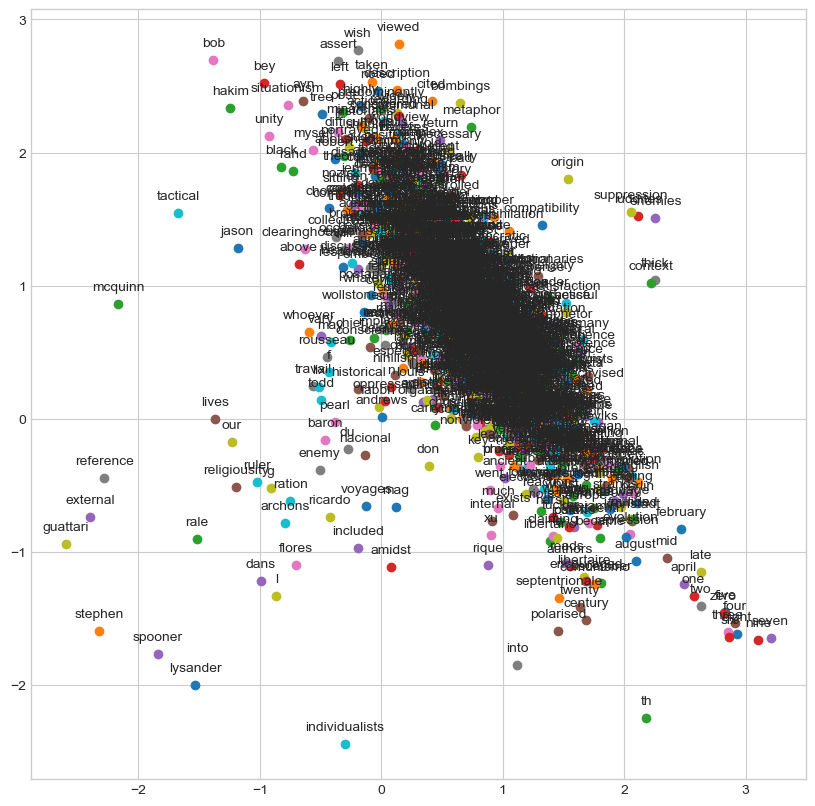

In [13]:
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

def preprocess_data(text, window_size):
    words = text.split()
    vocab = set(words)
    word_to_index = {word: i for i, word in enumerate(vocab)}
    index_to_word = {i: word for word, i in word_to_index.items()}

    pairs = []
    for i in range(len(words)):
        target = word_to_index[words[i]]
        context = [word_to_index[words[j]] for j in range(max(0, i-window_size), min(len(words), i+window_size+1)) if j != i]
        for c in context:
            pairs.append((target, c))
    
    return np.array(pairs), word_to_index, index_to_word, len(vocab)

def generate_batches(pairs, batch_size):
    np.random.shuffle(pairs)
    batches = [pairs[i:i + batch_size] for i in range(0, len(pairs), batch_size)]
    return batches

def skip_gram_batches(batches, vocab_size, d=2, lr=0.01, epochs=10):
    W = np.random.randn(vocab_size, d) * 0.01  # Embedding matrix
    V = np.random.randn(d, vocab_size) * 0.01  # Context matrix

    for epoch in range(epochs):
        epoch_loss = 0
        for batch in batches:
            loss = 0
            for target, context in batch:
                # Forward pass
                h = W[target]
                u = np.dot(h, V)
                y_pred = softmax(u)

                # Compute the loss: cross-entropy
                loss -= np.log(y_pred[context])

                # Backward pass: compute gradients
                error = y_pred
                error[context] -= 1
                dV = np.outer(h, error)
                dW = np.dot(error, V.T)

                # Update weights
                V -= lr * dV
                W[target] -= lr * dW
            
            epoch_loss += loss / len(batch)

        print(f"Epoch {epoch+1}, Average Loss: {epoch_loss / len(batches)}")

    return W

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def plot_embeddings(W, index_to_word):
    plt.figure(figsize=(10, 10))
    for i, word in index_to_word.items():
        plt.scatter(W[i, 0], W[i, 1])
        plt.annotate(word, (W[i, 0], W[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.show()

path_to_file = 'text8.zip'
with zipfile.ZipFile(path_to_file, 'r') as z:
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        words = f.read().decode('utf-8').split()
        limited_words = words[:5000]
        text = ' '.join(limited_words)
window_size = 2
batch_size = 256
pairs, word_to_index, index_to_word, vocab_size = preprocess_data(text, window_size)
batches = generate_batches(pairs, batch_size)
W = skip_gram_batches(batches, vocab_size, d=2, epochs=100)  
plot_embeddings(W, index_to_word)